In [ ]:
BOW의 Feature Vectrorizer 두 가지
-> 카운트 기반 벡터화,  TF-IDF

텍스트를  피쳐 벡터화한다. 워드 임베딩(Word embedding)이라고 한다.
2가지 방법
-> 1. BOW, word2vec

희소행렬의 압축해서 저장하는 두가지 방법
1. COO 2. CSR

In [ ]:
연속된 n개의 단어를 하나의 토큰화 단위로 분리
-> n-gram

카운트 벡터화를 위해 CountVectorizer( ) 사용하기 전에
반드시 텍스트 처리를 해야한다. -> X
클래스에 토큰화, 스톱워드 등등 전처리 기능이 있기 때문.

In [3]:
import numpy as np

dense = np.array([[0,1,0,3],
                  [1,2,0,0],
                  [0,0,1,0],
                  [0,2,0,0]])

# coo방식
data = np.array([1,3,1,2,1,2])
row = np.array([0,0,1,1,2,3])
col = np.array([1,3,0,1,2,1])

# csr방식
data = np.array([1,3,1,2,1,2])
row = np.array([0,2,4,5,6])
col = np.array([1,3,0,1,2,1])

In [9]:
# coo방식
from scipy import sparse

dense = np.array([[0,1,0,3],
                  [1,2,0,0],
                  [0,0,1,0],
                  [0,2,0,0]])

data = np.array([1,3,1,2,1,2])
row = np.array([0,0,1,1,2,3])
col = np.array([1,3,0,1,2,1])

sparse.coo_matrix((data, (row, col))).toarray()

array([[0, 1, 0, 3],
       [1, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 2, 0, 0]])

In [11]:
# csr방식
dense = np.array([[0,1,0,3],
                  [1,2,0,0],
                  [0,0,1,0],
                  [0,2,0,0]])

data = np.array([1,3,1,2,1,2])
row_index = np.array([0,2,4,5,6])
col = np.array([1,3,0,1,2,1])

sparse.csr_matrix((data, col, row_index)).toarray()

array([[0, 1, 0, 3],
       [1, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 2, 0, 0]])

In [ ]:
전처리 내용 및 순서:
사전 데이터 가곡(클렌징), 토큰화, 텍스트 정규화(스톱워드),
피처벡터화(워드임베딩)

In [12]:
text = 'I decided, very early on, just to accept life unconditionally. I never expected it to do anything special for me, yet I seemed to accomplish far more than I had ever hoped.Most of the time it just happened to me without my ever seeking it.'
text

'I decided, very early on, just to accept life unconditionally. I never expected it to do anything special for me, yet I seemed to accomplish far more than I had ever hoped.Most of the time it just happened to me without my ever seeking it.'

In [28]:
# 1. 위의 문장에서 스톱 워드를 제거해주세요.
import re

p = re.sub("[^a-zA-Z]", " ", text)
p

'I decided  very early on  just to accept life unconditionally  I never expected it to do anything special for me  yet I seemed to accomplish far more than I had ever hoped Most of the time it just happened to me without my ever seeking it '

In [29]:
# 2. 단어 토큰으로 만들어 주세요.
from nltk import word_tokenize
words = word_tokenize(text)
words

['I',
 'decided',
 ',',
 'very',
 'early',
 'on',
 ',',
 'just',
 'to',
 'accept',
 'life',
 'unconditionally',
 '.',
 'I',
 'never',
 'expected',
 'it',
 'to',
 'do',
 'anything',
 'special',
 'for',
 'me',
 ',',
 'yet',
 'I',
 'seemed',
 'to',
 'accomplish',
 'far',
 'more',
 'than',
 'I',
 'had',
 'ever',
 'hoped.Most',
 'of',
 'the',
 'time',
 'it',
 'just',
 'happened',
 'to',
 'me',
 'without',
 'my',
 'ever',
 'seeking',
 'it',
 '.']

In [ ]:
< SentiWordNet을 이용한 영화 감상평 감성 분석 >
1. 문서를 문장 단위로 분해
2. 다시 문장을 단어 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체 생성
4. Senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해
    특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정

# VADER를 이용한 감성 분석 - IMDB 영화평

In [32]:
import pandas as pd

review_df = pd.read_csv('./labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3) 

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [33]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape 

((17500, 1), (7500, 1))

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
senti_scores

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}

# 유사도

In [40]:
import numpy as np

v1 = np.array([1,2])
v2 = np.array([2,5])

def cos_simility(v1, v2):
    dot_product = np.dot(v1, v2)
    magnitude = np.sqrt(np.sum(np.square(v1))) * np.square(sum(np.square(v2)))
    
    return dot_product / magnitude

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape) 

(3, 18)


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
similarity_simple_pair

array([[1.        , 0.40207758, 0.40425045]])

# 문서 유사도 실습 (Opinion Review 데이터 세트)

In [53]:
import os
os.getcwd()

'C:\\Users\\admin'

In [60]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\\Users\\admin\\topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

In [61]:
for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

In [62]:
len(opinion_text)

51

In [66]:
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...
5,buttons_amazon_kindle,...
6,comfort_honda_accord_2008,...
7,comfort_toyota_camry_2007,...
8,directions_garmin_nuvi_255W_gps,...
9,display_garmin_nuvi_255W_gps,...


In [67]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens) 

In [68]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [71]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair) 

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.38038865 0.32619948 0.51442299 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


[[10  8  9 12 13  7 11 14 15  5  3  4  2  1  6]]
Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

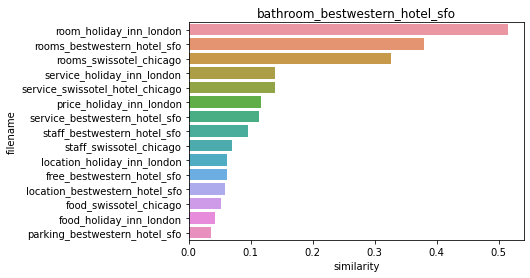

In [72]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]
print(sorted_index)

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
print(hotel_indexes)
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1,)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1,))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname) 

# 한글 KoNLPy

In [75]:
from konlpy.tag import Okt

In [79]:
okt = Okt()

In [80]:
okt.morphs("우리나라 대한민국")

['우리나라', '대한민국']

In [88]:
import pandas as pd

train_df = pd.read_csv('ratings.txt', sep='\t')
train_df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [89]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )
train_df.drop('id', axis=1, inplace=True)

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )
test_df.drop('id', axis=1, inplace=True) 

In [90]:
from konlpy.tag import Okt
okt = Okt()

In [94]:
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = okt.morphs(text)
    return tokens_ko 

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document']) 

In [96]:
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

params = { 'C' : [1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf,param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
grid_cv.best_params_, round(grid_cv.best_score_, 4)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


({'C': 3.5}, 0.8625)

In [98]:
from sklearn.metrics import accuracy_score

tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

accuracy_score(test_df['label'], preds)

0.93916

In [5]:
## 피처 벡터화로 변환하기 ##
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 주제 8개 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
       'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# cats 변수만 카테고리로 추출
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                            categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용한다.
count_vect = CountVectorizer(max_df=.95, max_features=1000, min_df=2, stop_words='english',
                            ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
feat_vect.shape

(7862, 1000)

7862개의 문서가 1000개의 피처로 구성된 행렬 데이터이다.

In [6]:
## 토픽 개수 조정하기 ##
## 책의 예제와 결과가 똑같이 나오게 하기 위함임 ##
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [7]:
## 각 토픽별로 연관도가 높은 Word를 나열하기 ##
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        
        # components_array에서 가장 값이 큰 순으로 정렬했을 떄,
        # 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        
        # top_indexes 대상인 인덱스별로 feature_names에 해당하는
        # word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        
# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
